In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from datetime import datetime

In [2]:
data = pd.read_pickle('../input/new_data.pkl')
weather = pd.read_pickle('../input/weather_cleaned.pkl')

In [3]:
data

,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
0,2023-01-01 00:00:00,Build1,272.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.000000,1.000000
1,2023-01-01 01:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.258819,0.965926
2,2023-01-01 02:00:00,Build1,273.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.500000,0.866025
3,2023-01-01 03:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.707107,0.707107
4,2023-01-01 04:00:00,Build1,267.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.965926,0.258819
8756,2023-12-31 20:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.866025,0.500000
8757,2023-12-31 21:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.707107,0.707107
8758,2023-12-31 22:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,-0.500000,0.866025


In [4]:
data= data.merge(weather, on='Timestamp', how='left')
data

,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,...,light shower(s),low drifting,mist,partial (covering part of the aerodrome) fog,patches fog,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h
0,2023-01-01 00:00:00,Build1,272.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01 01:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01 02:00:00,Build1,273.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01 03:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,2023-01-01 04:00:00,Build1,267.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8756,2023-12-31 20:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0
8757,2023-12-31 21:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,6.0
8758,2023-12-31 22:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-0.781831,0.62349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,7.0


In [5]:
data = data.drop(columns=['weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos'], inplace=False)
data['hour'] = data['Timestamp'].dt.hour
data['day'] = data['Timestamp'].dt.day
data['month'] = data['Timestamp'].dt.month
data['weekday'] = data['Timestamp'].dt.weekday
data

,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,T,P0,...,patches fog,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h,hour,day,month,weekday
0,2023-01-01 00:00:00,Build1,272.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,6
1,2023-01-01 01:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,6
2,2023-01-01 02:00:00,Build1,273.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,743.3,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1,6
3,2023-01-01 03:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,743.3,...,0.0,0.0,0.0,0.0,-1.0,0.0,3,1,1,6
4,2023-01-01 04:00:00,Build1,267.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,744.1,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.1,...,0.0,0.0,0.0,0.0,0.0,0.0,19,31,12,6
8756,2023-12-31 20:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.9,...,0.0,0.0,0.0,0.0,0.0,-6.0,20,31,12,6
8757,2023-12-31 21:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-7.0,758.9,...,0.0,0.0,0.0,0.0,-1.0,6.0,21,31,12,6
8758,2023-12-31 22:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-8.0,758.9,...,0.0,0.0,0.0,0.0,-1.0,7.0,22,31,12,6


In [6]:
def preprocess_building_timeseries(df, lags=[1]):
    df = df.copy()
    
    # Generate lag features
    for lag in lags:
        df[f'Usage_lag_{lag}'] = df.groupby('Building_ID')['Usage'].shift(lag)
    
    # Backfill the NaN values created by lagging
    df = df.fillna(method='bfill')

    return df

In [7]:
data = preprocess_building_timeseries(data)
data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14720\3713203130.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


,Timestamp,Building_ID,Usage,Area,month_sin,month_cos,day_sin,day_cos,T,P0,...,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h,hour,day,month,weekday,Usage_lag_1
0,2023-01-01 00:00:00,Build1,272.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,0,1,1,6,272.0
1,2023-01-01 01:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,...,0.0,0.0,0.0,0.0,0.0,1,1,1,6,272.0
2,2023-01-01 02:00:00,Build1,273.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,743.3,...,0.0,0.0,0.0,0.0,0.0,2,1,1,6,264.0
3,2023-01-01 03:00:00,Build1,264.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,743.3,...,0.0,0.0,0.0,-1.0,0.0,3,1,1,6,273.0
4,2023-01-01 04:00:00,Build1,267.0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,744.1,...,0.0,0.0,0.0,0.0,0.0,4,1,1,6,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.1,...,0.0,0.0,0.0,0.0,0.0,19,31,12,6,NaN
8756,2023-12-31 20:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.9,...,0.0,0.0,0.0,0.0,-6.0,20,31,12,6,NaN
8757,2023-12-31 21:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-7.0,758.9,...,0.0,0.0,0.0,-1.0,6.0,21,31,12,6,NaN
8758,2023-12-31 22:00:00,Build1,NaN,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-8.0,758.9,...,0.0,0.0,0.0,-1.0,7.0,22,31,12,6,NaN


In [8]:
X = data.drop(columns=['Timestamp', 'Building_ID', 'Usage']).copy()
X

,Area,month_sin,month_cos,day_sin,day_cos,T,P0,P,U,Ff,...,rain,small hail and/or snow pellets,snow,temp_diff_1h,humid_diff_1h,hour,day,month,weekday,Usage_lag_1
0,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,746.3,93.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,6,272.0
1,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,742.6,746.3,93.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,6,272.0
2,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,5.0,743.3,747.0,93.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2,1,1,6,264.0
3,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,743.3,747.0,93.0,6.0,...,0.0,0.0,0.0,-1.0,0.0,3,1,1,6,273.0
4,6991,5.000000e-01,0.866025,2.012985e-01,0.97953,4.0,744.1,747.8,93.0,6.0,...,0.0,0.0,0.0,0.0,0.0,4,1,1,6,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.1,762.0,86.0,2.0,...,0.0,0.0,0.0,0.0,0.0,19,31,12,6,NaN
8756,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-6.0,758.9,762.8,80.0,2.0,...,0.0,0.0,0.0,0.0,-6.0,20,31,12,6,NaN
8757,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-7.0,758.9,762.8,86.0,1.0,...,0.0,0.0,0.0,-1.0,6.0,21,31,12,6,NaN
8758,6991,-2.449294e-16,1.000000,-2.449294e-16,1.00000,-8.0,758.9,762.8,93.0,0.0,...,0.0,0.0,0.0,-1.0,7.0,22,31,12,6,NaN


In [9]:
features = X.columns
print(features, len(features))

Index(['Area', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'T', 'P0', 'P',
       'U', 'Ff', 'Td', 'Drizzle', 'Fog', 'Freezing (supercooled) drizzle',
       'Freezing (supercooled) fog', 'Ground fog', 'Heavy drizzle',
       'Heavy shower(s)', 'Heavy snow', 'Heavy thunderstorm',
       'In the vicinity shower(s)', 'In the vicinity thunderstorm',
       'Light drizzle', 'Light freezing (supercooled) drizzle',
       'Light freezing (supercooled) fog', 'Light rain', 'Light shower(s)',
       'Light snow', 'Light snow grains', 'Light thunderstorm', 'Low drifting',
       'Mist', 'Patches fog', 'Rain', 'Shower(s)', 'Smoke', 'Snow',
       'blowing snow', 'drizzle', 'fog', 'freezing (supercooled) fog',
       'in the vicinity shower(s)', 'in the vicinity thunderstorm',
       'light shower(s)', 'low drifting', 'mist',
       'partial (covering part of the aerodrome) fog', 'patches fog', 'rain',
       'small hail and/or snow pellets', 'snow', 'temp_diff_1h',
       'humid_diff_1h', 'ho

In [10]:
y = data['Usage'].copy()
y

0       272.0
1       264.0
2       273.0
3       264.0
4       267.0
        ...  
8755      NaN
8756      NaN
8757      NaN
8758      NaN
8759      NaN
Name: Usage, Length: 8760, dtype: float64

In [11]:
groups = data['Building_ID'].copy()
groups

0       Build1
1       Build1
2       Build1
3       Build1
4       Build1
         ...  
8755    Build1
8756    Build1
8757    Build1
8758    Build1
8759    Build1
Name: Building_ID, Length: 8760, dtype: object

Building_IDs in train set: ['Build1']
Building_IDs in validation set: ['Build1']
Train shape: (1416, 58), Validation shape: (7344, 58)
Train shape: (1416,), Validation shape: (7344,)
Validation building: Build1
[0]	validation_0-rmse:70.43766
[1000]	validation_0-rmse:0.08812
[2000]	validation_0-rmse:0.00341
[2943]	validation_0-rmse:0.00341


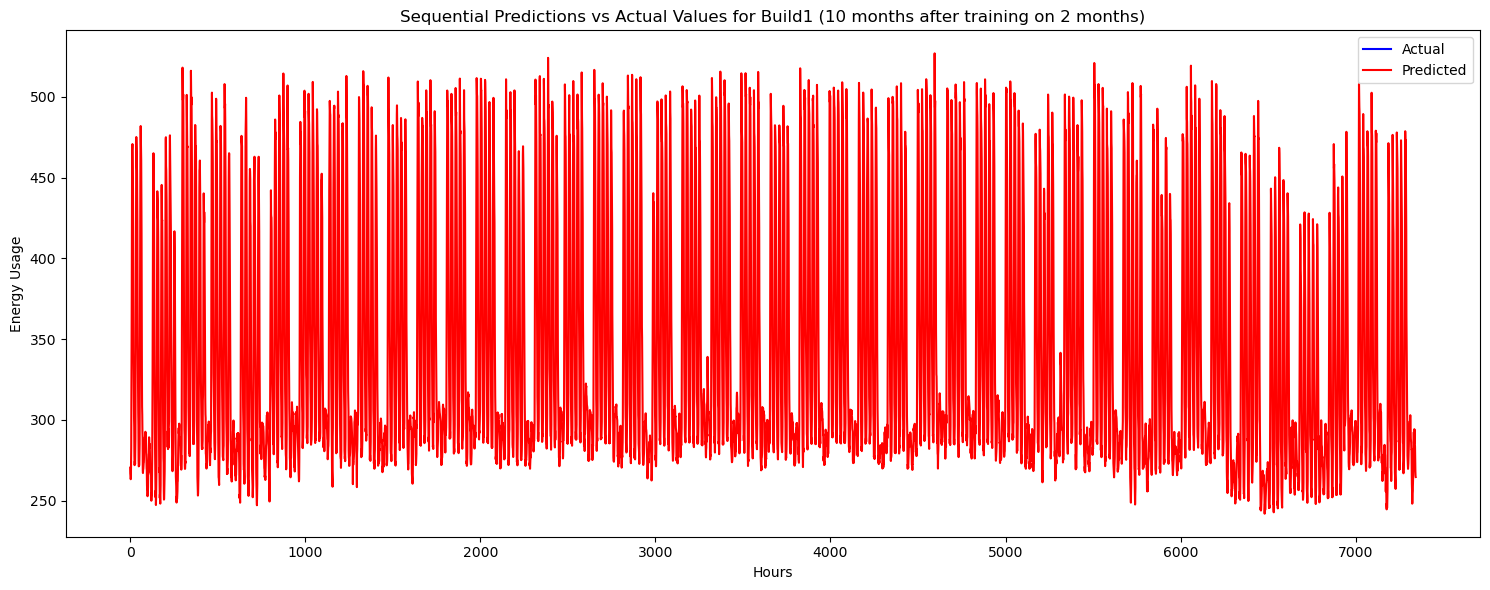

In [ ]:
train_index = list(range(0, 1416))
validation_index = list(range(1416, len(y)))

print("Building_IDs in train set:", groups.iloc[train_index].unique())
print("Building_IDs in validation set:", groups.iloc[validation_index].unique())
X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
print(f"Train shape: {X_train.shape}, Validation shape: {X_validation.shape}")
print(f"Train shape: {y_train.shape}, Validation shape: {y_validation.shape}")

val_building = groups.iloc[validation_index].unique()[0]
print(f"Validation building: {val_building}")

# Initialize the model
model = xgb.XGBRegressor(
        n_estimators=5000,
        early_stopping_rounds=1000,
        objective='reg:squarederror',
        eval_metric=['rmse'],
        learning_rate=0.1,
        reg_alpha=0,
        reg_lambda=0.1,
        min_child_weight=0,
        max_depth=6,
        subsample=1,
        colsample_bytree=1,
        random_state=2025
    )
    
# Train model on training data
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)],
    verbose=1000
)

# Initialize predictions array
y_pred = np.zeros(len(X_validation))

# Step 1: Predict the first value using last known real usage
current_features = X_validation.iloc[0].copy()
y_pred[0] = model.predict(current_features.values.reshape(1, -1))[0]

# Step 2 onwards: Predict recursively using previous prediction
for i in range(1, len(X_validation)):
    current_features = X_validation.iloc[i].copy()
    current_features['Usage_lag_1'] = y_pred[i - 1]
    y_pred[i] = model.predict(current_features.values.reshape(1, -1))[0]

# Plotting the predictions vs actual values
plt.figure(figsize=(15, 6))
plt.plot(y_validation.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title(f'Sequential Predictions vs Actual Values for {val_building} (10 months after training on 2 months)')
plt.xlabel('Hours')
plt.ylabel('Energy Usage')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
new_df = pd.DataFrame(columns=['Timestamp', 'Usage'])

start = datetime(2023, 3, 1)
end = datetime(2024, 1, 1)
date_range = pd.date_range(start, end, freq='h')[:-1]

new_df['Timestamp'] = date_range
new_df['Usage'] = y_pred

new_df

,Timestamp,Usage
0,2023-03-01 00:00:00,270.455994
1,2023-03-01 01:00:00,266.864899
2,2023-03-01 02:00:00,265.732452
3,2023-03-01 03:00:00,263.292969
4,2023-03-01 04:00:00,264.524231
...,...,...
7339,2023-12-31 19:00:00,283.449585
7340,2023-12-31 20:00:00,275.630554
7341,2023-12-31 21:00:00,268.521545
7342,2023-12-31 22:00:00,265.363007


In [ ]:
# new_df.to_csv('results/solution/result.csv')